# Regressão Linear - Grupo de DS Avançado


#### Autor: Rafael Barbosa - [LinkedIn](https://www.linkedin.com/in/rafael-barbosa0/) - [Github](https://github.com/barbosarafael)



<p align="center">
  <img alt="decision_tree" src="https://pics.me.me/linear-regression-is-not-machine-learning-is-change-my-mind-45626240.png" alt="drawing" width="500" height="400"/>
  <br>
    <em> <b> Polêmica de primeira assim ? </b> </em>
</p>

## 1. Introdução

---

- A Regressão Linear é um método estatístico, também utilizado em aprendizado de máquina, para fornecer a relação linear entre uma ou mais variáveis X (chamadas de **dependente(s), explicativa(s), feature(s), etc**) com uma outra variável fixa Y (esta chamada de **independente, resposta, target, etc**);

- A partir desse momento chamarei as variáveis desse jeito:

  - **X**: Explicativa(s)
  - **Y**: Resposta

- Quando temos somente uma variável X **explicativa**, chamamos de Regressão Linear Simples. Por exemplo:

  - **X**: Peso da pessoa; **Y**: Altura da pessoa;
  - **X**: Tempo de uso; **Y**: Preço do carro.

- Já quando possui duas ou mais variáveis **explicativas**, então chamamos de Regressão Linear Múltipla. Por exemplo:

  - **X**: Peso da pessoa, tamanho da cintura e largura do braço; **Y**: Altura da pessoa;
  - **X**: Tempo de uso e tamanho do capô; **Y**: Preço do carro.

- Podemos utilizar a Regressão Linear com duas finalidades:

  - Modelagem: Onde queremos verificar o quanto cada variável explicativa impacta na nossa variável resposta, por meio do coeficiente resultante;

  - Previsão: Quando queremos prever novos dados a partir do nosso modelo já criado.

- Supondo uma variável X explicativa qualquer e outra Y resposta, podemos verificar, empiricamente, a relação linear entre elas por meio de um gráfico de dispersão (scatterplot);

- Se quisermos verificar estatisticamente e imparcialmente podemos fazer aplicar uma técnica chamada de correlação linear de Pearson.

# 2. Correlação

---

- Mede o nível de associação linear entre duas variáveis quantitativas X e Y;

- Esta associação pode apresentar as seguintes particularidades:

  - Ser **positiva**, isto é, os valores das variáveis X e Y são diretamente proporcionais. Exemplo hipotético, quanto maior o peso **maior** a altura;

  - Ser **negativa**, isto é, os valores das variáveis X e Y são inversamente proporcionais. Exemplo hipotético, quanto maior o peso **menor** a altura;

  - Não possuir correlação.

- Como mencionado acima, a correlação pode ser medida intuitivamente ou "cientificamente" correta;

## 2.1. Scatterplot (método informal)

<p align="center">
  <img alt="decision_tree" src="https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png" alt="drawing" width="600" height="300"/>
  <br>
    <em> <b> Finjam que não existem os números e somente observem o comportamento dos pontos e a direção da seta. Retirado de: </b> https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/ </em>
</p>

- Os pontos gerados para a construção do *scatterplot* são gerados a partir de cada observação (linha) que corresponde a um ponto no $ R^2 $ com as coordenadas $ (x_i, y_i), i = 1, 2, ..., n $;

- Nele podemos verificar informalmente mas não podemos provar "cientificamente" (aquele famoso numerozinho) que a variável X possui uma relação linear com a Y;

- Por isso temos o coeficiente de correlação de Pearson.

## 2.2. Coeficiente de correlação de Pearson (método formal)

<p align="center">
  <img alt="decision_tree" src="https://3.bp.blogspot.com/-CVoTLNP0_lo/WJnRWLD_sKI/AAAAAAAAAI8/t5OxUzBAyfYHUWpxT4oOP6qvkZXVjBpFACLcB/s320/1j58h9.jpg" alt="drawing" width="400" height="300"/>
  <br>
    <em> <b> Memes everywhere. Retirado de: </b> https://adampegler.blogspot.com/2017/02/bonetts-2008-method-for-confidence.html </em>
</p>

- Calculado a partir da fórmula abaixo:

$$ R_{xy} = \frac{\sum_{i = 1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i = 1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i = 1}^{n}(y_i - \bar{y})^2}} $$

- Ele é o responsável por soltar o "numerozinho" que usaremos para verificar a relação linear entre a variável explicativa X e a resposta Y;

- Este coeficiente $ R_{xy} $ varia de -1 a 1 e pode ter algumas das seguintes interpretações:

  - Se $ R_{xy} $ = -1, então a relação linear entre as variáveis X e Y é **positiva** e perfeita;
  - Se $ R_{xy} $ = 0, então não existe relação linear entre as variáveis X e Y;
  - Se $ R_{xy} $ = 1, então a relação linear entre as variáveis X e Y é **negativa** e perfeita.

## 2.3. Exemplo no Python

- Inicialmente vamos utilizar duas variáveis do dataset iris para verificar como interpretar esta correlação

### 2.3.1 Scatterplot

- Por meio do scatterplot podemos verificar que há uma tendência decrescete entre a relação da **Sepal Width** com a **Petal Length**, indicando que elas possuem uma correlação linear negativa;

- Já entre as variáveis **Petal Length** e **Sepal Length**, temos indicadores de uma relação diretamente proporcional entre elas, dado que a tendência da reta é crescente;

- Novamente, essa ideia do scatterplot é justamente ter um indicador de correlação. Não conseguimos comprovar cientificamente a partir dela.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


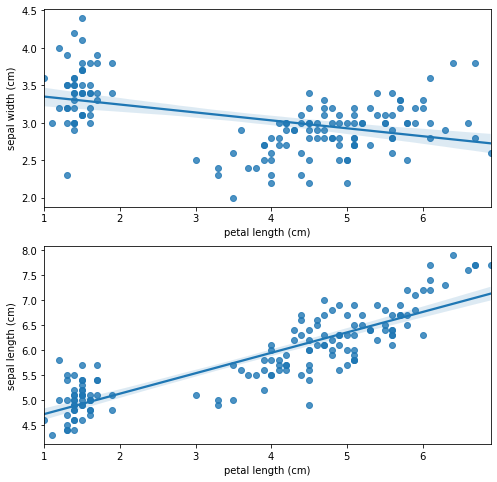

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)

f, axes = plt.subplots(2, 1, figsize = (8, 8))

sns.regplot(x = df["petal length (cm)"], y = df["sepal width (cm)"], ax = axes[0])
sns.regplot(x = df["petal length (cm)"], y = df["sepal length (cm)"], ax = axes[1])

plt.show()

### 2.3.2. Correlação Linear de Pearson

- O resultado abaixo nos mostra a matriz de correlação entre as mesmas variáveis do gráfico acima;

- Os resultados a serem observados são aqueles que correspondem a nossa primeira variável na linha (ou coluna) e segunda variável na coluna (ou linha).Nela podemos comprovar que:

  - A relação linear entre a **Petal Length** e **Sepal Length** é realmente negativa;

  - A realação linear entre a **Petal Length** e **Sepal Width** é realmente positiva;

- Também podemos observar que a correlação linear entre as variáveis iguais entre si, isto é, **Sepal Length** na linha e **Sepal Length** na coluna, sempre vai ter a correlação perfeita com o valor de 1 para a esta.

In [2]:
df[["petal length (cm)", "sepal width (cm)", "sepal length (cm)"]].corr()

,petal length (cm),sepal width (cm),sepal length (cm)
petal length (cm),1.000000,-0.42844,0.871754
sepal width (cm),-0.428440,1.00000,-0.117570
sepal length (cm),0.871754,-0.11757,1.000000


# 3. Regressão

- Como mencionado acima, a regressão busca entender a relação entre a(s) variável(is) explicativas X com a resposta Y;

- A regressão possui a seguinte forma de cálculo:

$$ Y_i = \beta_0 + \sum^{n}_{i = 1}\beta_i X_i + \epsilon_i, \quad i = 1, 2, \dots, n $$

- onde:

  - $ Y_i $ representa a variável resposta que queremos prever, dada os valores da equação;

  - $ \beta_0 $ representa o coeficiente que devemos estimar que representa o intercepto da reta com o eixo Y do gráfico;

  - $ \beta_i $ se este coeficiente tiver $ i = 1 $, então a regressão é denominada de Simples, já se este for $ i > 1 $, então chamamos de regressão Múltipla. Ele é chamado de coeficiente angular, pois ele quem determina a inclinação da reta e, também, representa o quanto varia a média de Y para um aumento de uma unidade na variável **X**;

  - $ X_i $ mesmo esquema com o $ i $ do $ \beta_i $ sobre a ser Simples ou Múltipla, já que ela também faz parte do somatório. Representam as nossas variáveis explicativas **X** no modelo. Cada variável explicativa **X** terá um coeficiente $ \beta $ associado a esta;

  - $ \epsilon $ é o erro associado a diferença entre o valor previsto e o observado.

- O método de estimação para os coeficientes $ \hat{\beta_0} $ e $ \hat{\beta_i} $ mais conhecido é o Método dos Mínimos Quadrados. Na qual possui o objetivo de achar os coeficientes para que estes minimizem a Soma do Quadrado dos Erros (SQE). Podemos começar a demonstração do seguinte método:

$$ \epsilon =  Y_i - \beta_0 + \sum^{n}_{i = 1}\beta_i X_i $$


- O restante da demonstração você pode verificar no [material de aula da professora Lígia Henriques-Rodrigues](https://www.ime.usp.br/~fmachado/MAE229/AULA10.pdf), no [material do professor Luiz Alexandre Peternelli](http://www.dpi.ufv.br/~peternelli/inf162.www.16032004/materiais/CAPITULO9.pdf) e neste [material do professor Marcone Jamilson](http://www.decom.ufop.br/prof/marcone/Disciplinas/MetodosNumericoseEstatisticos/QuadradosMinimos.pdf).


## 3.1. Premissas para o uso

- Entretanto, nem tudo é flores. Esse método de estimação nos obriga (geralmente, né) que os nossos dados estejam totalmente corretos e obedeçam as suposições para poder aplicá-la corretamente;

- Quando eu menciono corretamente é por que nem sempre todo mundo verifica elas, existem casos e casos;

- Segundo este [artigo](https://periodicos.ufpe.br/revistas/politicahoje/article/download/3808/31622), autora menciona que para a regressão com o método de mínimos quadrados (OLS), existem 10 pressupostos que devem ser aceitos para que o modelo de Regressão seja consistente.

### 3.1.1. Relação entre a(s) variável(is) explicativa(s) com a variável resposta

- É esperado que essa relação possa ser representada por uma função linear, isto é, nos parâmetros/coeficientes;

- Se essa relação se distanciar de uma função linear, a diferença entre os parâmetros estimados e os verdadeiros valores destes parâmetros não serão próximos e o OLS não irá produzir o melhor estimador linear não-viesado;

- O ideal é justamente que esses parâmetros estimados sejam os mais próximos dos verdadeiros possíveis;

- Uma das formas de contornar esse problema é fazer transformações nas variáveis explicativas X, como raiz quadrado, log, potências, etc;


### 3.1.2. Variáveis medidas adequadamente

- Assim como nas demais áreas, se uma variável é mensurada incorretamente, qualquer interpretação ou inferência a partir dela não serão confiáveis;

- No modelo de regressão não é diferente, estas variáveis mensuradas incorretamente irão produzir estimativas incorretas para nossos parâmetros $ \beta $s, fazendo com que as interpretações para estes sejam totalmente erradas;

### 3.1.3. O erro possui média 0

- Significa dizer que os erro (fatores que não estão incluídos no modelo) não afetam o valor médio de Y;

- Por estarmos considerando que a média irá ser 0, então os valores das estimativas diferem igualmente tanto para valores positivos, quanto para negativos e eles acabam por se anular;

- Violar essa premissa afeta a estimativa do intercepto.

### 3.1.4. Homocedasticidade do erro

<p align="center">
  <img alt="decision_tree" src="https://methods.sagepub.com/images/virtual/heteroscedasticity-in-canada-fuel-2015-stata/10.4135_9781526472601-fig1.jpg" alt="drawing" width="600" height="300"/>
  <br>
    <em> <b> Exemplo de homocedasticidade e heterocedasticidade. Retirado de: </b> https://methods.sagepub.com/dataset/heteroscedasticity-in-canada-fuel-2015-stata </em>
</p>



- Nesse caso, assumimos que os valores dos **resíduos** (diferença entre o valor observado e o estimado da nossa variável resposta Y) devem ser distribuídos uniformemente, isto é, $ E(e_i^2) = \sigma^2 $;

- A violação desse pressuposto afeta as estimativas do método OLS, na qual prejudica a confiabilidade dos testes de significância e intervalos de confiança;

- Para contornar esse problema, podemos adicionar aumentar o número de observações, se possível, ou utilizar as transformações nas variáveis novamente;

- Pode-se também verificar esse problema através de um teste estatístico formal. Um deles é o de Levene.

### 3.1.5. Ausência de autocorrelação nos erros

- Quando os erros são ordenados, não poderá haver nenhuma relação entre eles;

- Um pouco mais formal: é uma correlação existente entre uma observação de erro *i* qualquer com sua anterior *i - 1*, logo, $ E(e_i, e_j) = 0 $;

- Um método de verificar essa premissa é a partir do teste de Durbin-Watson.

### 3.1.6. A variável resposta não deve ser correlacionada com o erro (*)

### 3.1.7. Seleção de variáveis úteis ou não

- Aqui entra, inicialmente, o príncipio da parcimônia. Se a sua métrica muda pouco quando você adiciona muitas variáveis, então o mais correto seria preservar a complexidade do modelo e deixar ele com o menor número possíveis de variáveis, dado sua métrica;

- Todas as variáveis importantes **devem ser** incluídas no modelo, assim como as variáveis não importantes **não devem** ser incluídas;

- As variáveis que não são importantes no modelo irão enviesar os parâmetros do modelo, causando problemas no erro padrão das estimativas.

### 3.1.8. Multicolineariedade

### 3.1.9. O erro possui distribuição normal

- Com média $ \mu = 0 $ e variância $ \sigma^2 $;

- Para que os coeficientes estimados, $ \beta $s e $ \sigma $ sejam não-viesados e eficientes, a distribuição do erro deve ser normal ou gaussiana;

- Pode ser verificada a partir dos testes formais de normalidade, como Shapiro-Wilk, Anderson-Darling, etc.

### 3.1.10. Proporção entre o número de observação e de variáveis

- Essa afirmação envolve a questão de inversão de matrizes;

- E também é desejável que as amostras sejam grandes o suficiente, até mesmo para que possamos entrar no Teorema Central do Limite para realmente confirmar que aquelas variáveis convergem a uma distribuição normal,

# Referências

1. Bussab e Morettin
2. O que Fazer e o que Não Fazer com a Regressão: pressupostos e aplicações do modelo linear de Mínimos Quadrados Ordinários (MQO)
3. https://towardsdatascience.com/assumptions-of-linear-regression-algorithm-ed9ea32224e1
4. https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
5. https://www.ime.usp.br/~fmachado/MAE229/AULA10.pdf
6. https://ubibliorum.ubi.pt/bitstream/10400.6/1869/1/Tese%20Sandra%20Rodrigues.pdf
7. https://matheusfacure.github.io/2017/02/15/MQO-formula-analitica/
8. http://www.dpi.ufv.br/~peternelli/inf162.www.16032004/materiais/CAPITULO9.pdf